In [1]:
# Import data science essentials
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

# Import plotting essentials
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

In [2]:
btc_file = 'coin_Bitcoin.csv'
eth_file = 'coin_Ethereum.csv'

In [3]:
btc_df = pd.read_csv(btc_file,index_col='Date',parse_dates=True)
eth_df = pd.read_csv(eth_file,index_col='Date',parse_dates=True)

In [4]:
btc_df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
btc_df.shape

(2991, 9)

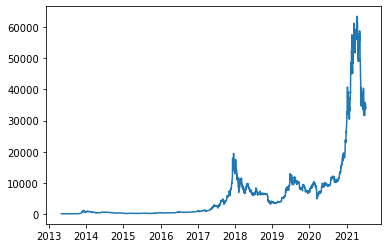

In [6]:
plt.plot(btc_df.index,btc_df['Close'])
plt.show()

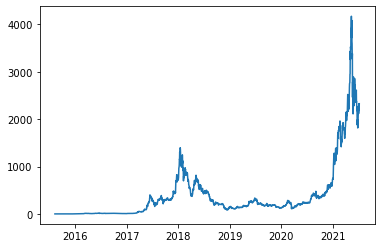

In [7]:
plt.plot(eth_df.index,eth_df['Close'])
plt.show()

In [8]:
rolling_btc_df = btc_df.rolling(window=30).mean()
rolling_btc_df

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
2013-04-29 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2972.5,36856.463381,34172.505273,35740.276234,35618.790261,3.995017e+10,6.673860e+11
2021-07-03 23:59:59,2973.5,36704.140338,34044.462700,35615.443281,35467.449674,3.958094e+10,6.645766e+11
2021-07-04 23:59:59,2974.5,36593.976368,34000.421206,35462.879235,35413.895489,3.901738e+10,6.635985e+11


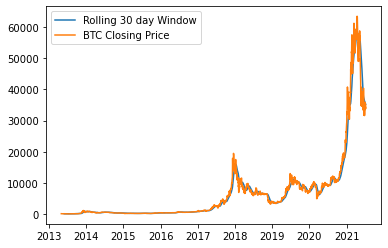

In [9]:
plt.plot(rolling_btc_df.index,rolling_btc_df['Close'],label='Rolling 30 day Window')
plt.plot(btc_df.index,btc_df['Close'],label='BTC Closing Price')
plt.legend()
plt.show()

In [10]:
last_date = btc_df.index.max()
year = last_date - timedelta(days=359)

end_date = f"{last_date.year}-{last_date.month}-{last_date.day}"
start_date = f"{year.year}-{year.month}-{year.day}"

In [11]:
a = btc_df[start_date:end_date]
b = eth_df[start_date:end_date]

In [12]:
a

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-07-12 23:59:59,2632,Bitcoin,BTC,9319.419417,9197.450320,9241.055044,9276.499850,1.445236e+10,1.709774e+11
2020-07-13 23:59:59,2633,Bitcoin,BTC,9306.404930,9224.292841,9277.204660,9243.613855,1.751982e+10,1.703797e+11
2020-07-14 23:59:59,2634,Bitcoin,BTC,9283.842142,9171.661118,9238.703228,9243.213416,1.808504e+10,1.703807e+11
2020-07-15 23:59:59,2635,Bitcoin,BTC,9275.325125,9171.933554,9241.897000,9192.837368,1.584473e+10,1.694601e+11
2020-07-16 23:59:59,2636,Bitcoin,BTC,9214.312698,9088.947402,9191.980234,9132.227863,1.571397e+10,1.683505e+11
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03 23:59:59,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04 23:59:59,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


In [13]:
b

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-07-12 23:59:59,1801,Ethereum,ETH,243.311136,237.770211,239.459634,242.131695,6.596395e+09,2.705416e+10
2020-07-13 23:59:59,1802,Ethereum,ETH,244.310516,238.232370,242.181866,239.604585,7.787751e+09,2.677507e+10
2020-07-14 23:59:59,1803,Ethereum,ETH,242.003777,237.796193,239.975615,240.211494,7.357459e+09,2.684615e+10
2020-07-15 23:59:59,1804,Ethereum,ETH,241.402696,237.096171,240.143642,238.423527,6.189328e+09,2.664958e+10
2020-07-16 23:59:59,1805,Ethereum,ETH,239.006253,231.621169,238.450916,233.640883,5.832058e+09,2.611816e+10
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2156,Ethereum,ETH,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2021-07-03 23:59:59,2157,Ethereum,ETH,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2021-07-04 23:59:59,2158,Ethereum,ETH,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11


In [14]:
a.index.min()+timedelta(days=360)

Timestamp('2021-07-07 23:59:59')

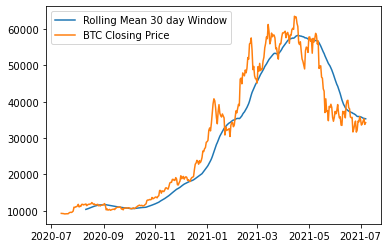

In [15]:
plt.plot(a.index,a['Close'].rolling(window=30).mean(),label='Rolling Mean 30 day Window')
plt.plot(a.index,a['Close'],label='BTC Closing Price')
plt.legend()
plt.show()

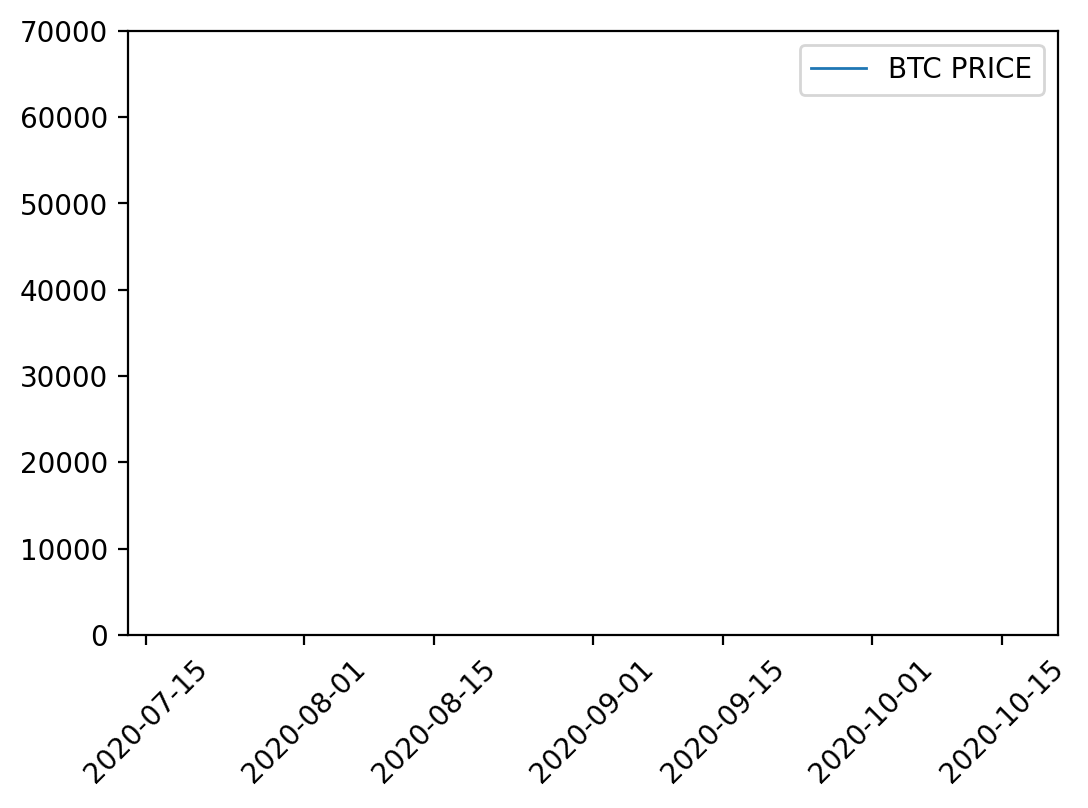

In [32]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(dpi=200)

# Set up x-axis moving window
moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()

# Update plot with starting background axis and labels
ax = plt.axes(xlim=(x_first,x_last),ylim=(0,70000))
line, = ax.plot([], [], lw=1,label='BTC PRICE')
line.axes.tick_params(axis='x', labelrotation = 45)
plt.legend()

In [17]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

In [18]:
moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()
dt = timedelta(days=1)

def animate(i):
    global x_last
    global x_first
    global dt
    
    x = a.index[:i]
    y = a['Close'][:i]
    line.set_data(x, y)
    
    if a.index[i] >= x_last-dt:
        x_last += dt 
        x_first += dt
        line.axes.set_xlim(x_first,x_last)
        
    return line,

In [19]:
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(a.index), interval=100, blit=False)

In [20]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [21]:
anim

In [22]:
a.index.min()

Timestamp('2020-07-12 23:59:59')

In [24]:
log_close_btc = a['Close']

In [25]:
log_close_btc

Date
2020-07-12 23:59:59     9276.499850
2020-07-13 23:59:59     9243.613855
2020-07-14 23:59:59     9243.213416
2020-07-15 23:59:59     9192.837368
2020-07-16 23:59:59     9132.227863
                           ...     
2021-07-02 23:59:59    33897.048590
2021-07-03 23:59:59    34668.548402
2021-07-04 23:59:59    35287.779766
2021-07-05 23:59:59    33746.002456
2021-07-06 23:59:59    34235.193451
Name: Close, Length: 360, dtype: float64

In [26]:
log_close_btc = np.log(log_close_btc)

In [27]:
log_close_btc

Date
2020-07-12 23:59:59     9.135240
2020-07-13 23:59:59     9.131688
2020-07-14 23:59:59     9.131645
2020-07-15 23:59:59     9.126180
2020-07-16 23:59:59     9.119565
                         ...    
2021-07-02 23:59:59    10.431083
2021-07-03 23:59:59    10.453588
2021-07-04 23:59:59    10.471292
2021-07-05 23:59:59    10.426617
2021-07-06 23:59:59    10.441009
Name: Close, Length: 360, dtype: float64

In [28]:
log_close_eth = b['Close']
log_close_eth = np.log(log_close_eth)
log_close_eth

Date
2020-07-12 23:59:59    5.489482
2020-07-13 23:59:59    5.478990
2020-07-14 23:59:59    5.481520
2020-07-15 23:59:59    5.474049
2020-07-16 23:59:59    5.453785
                         ...   
2021-07-02 23:59:59    7.673242
2021-07-03 23:59:59    7.708013
2021-07-04 23:59:59    7.750065
2021-07-05 23:59:59    7.695568
2021-07-06 23:59:59    7.751337
Name: Close, Length: 360, dtype: float64

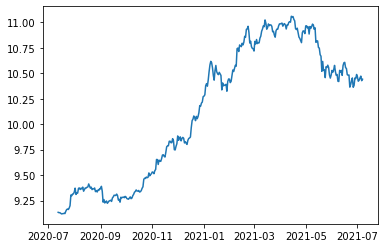

According to finance theory the log of price is essentially a random walk


In [31]:
plt.plot(log_close_btc.index,log_close_btc)
plt.show()
print("According to finance theory the log of price is essentially a random walk")

In [39]:
spread_btc = []
spread_eth = []
for i in range(len(log_close_btc)):
    if i+1 > len(log_close_btc)-1:
        break
        
    spread_btc.append(log_close_btc[i+1]-log_close_btc[i])
    spread_eth.append(log_close_eth[i+1]-log_close_eth[i])

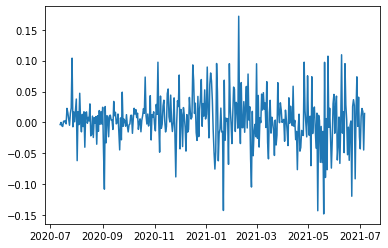

In [42]:
plt.plot(log_close_btc.index[:-1],spread_btc)
plt.show()

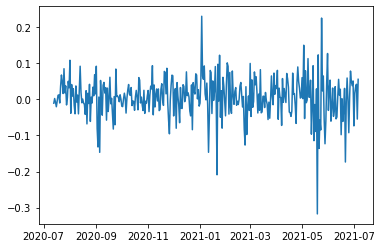

In [43]:
plt.plot(log_close_eth.index[:-1],spread_eth)

In [46]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

def cointegration_test(Y, X):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(Y, X).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)

In [48]:
cointegration_test(spread_btc,spread_eth)

(-19.000566665670526,
 0.0,
 0,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 -1484.5987437397043)